# K-Means Clustering Exercises

### Exercise 1: Compute the centroid of a list of points

* Implement a python function that computes the centroid of an array of points.
* Visualize the points and the centroid using matplotlib (```plt.scatter()```could be helpful).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Plot generated data and center


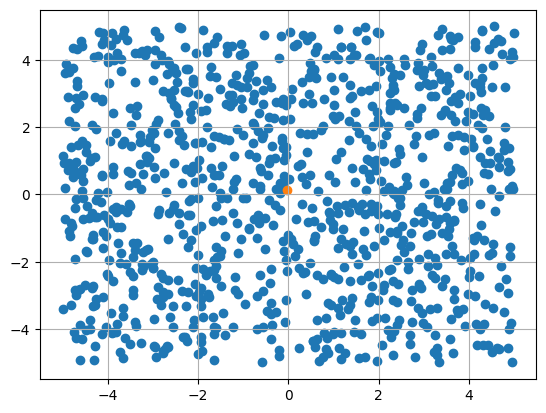

In [2]:
# Generate some random points
#
std = 5
mean = 0

# X = mean + np.random.uniform(-1, 1, size=(4, 2)) * std
X = mean + np.random.uniform(-1, 1, size=(1000, 2)) * std


# calculate center point
center = np.mean(X, axis = 0)

plt.scatter(X[:,0], X[:,1])
plt.scatter(x = center[0], y = center[1])

print(f"Plot generated data and center")
plt.grid(True)


In [3]:
center

array([-0.02313642,  0.13199969])

In [4]:
X[0]

array([ 2.36243403, -0.68294585])

### Exercise 2: Implement the k-means Algorithm

* Implement the k-means algorithm, use X as your test data.
* Use the ```plot_clusters()``` to visualize your results.
* What happens when you run the clustering multiple times, how do the results change?


*Hints:*
* Use the ```np.random.choice()```function to select the indices to initialize the cluster centroids (use the ```replace=False``` parameter)
* You can initialize an empty numpy array using the ```np.zeros()``` function.
* The ```np.argmin()``` function can be used to find the index of the smallest value in a numpy array.
* Logical indexing can be very helpful here ```X[Y == 1, :]``` selects all vectors with a cluster label of 1.

**Use the follwing method stub:**
```python
def kmeans(X, k):
    """ Perform k-means clustering of data X into k partitions.
    
    Parameters
    ----------
    X: np.array
        A numpy array of feature vectors.

    Returns
    ----------
    A one-dimensional numpy array containing the assigned cluster indices for each vector in X.
```

In [24]:
def kmeans(X, k):
    """ Perform k-means clustering of data X into k partitions.
    
    Parameters
    ----------
    X: np.array
        A numpy array of feature vectors.

    Returns
    ----------
    tuple ( numpy array(k, 2) centroid coordinates, 
        A one-dimensional numpy array containing the assigned cluster indices for each vector in X.)
    """

    ## Initialization

    chosen_indices = np.random.choice(X.shape[0], k, replace = False)
    
    ## Assignment
    
    initial_centroids = X[chosen_indices]

    ## Update
    # loop
    old_centroids = initial_centroids
    while(True):
        
        # initialize np array 
        distances = np.zeros((X.shape[0], k))
        # fill with distance values  
        for i in range(X.shape[0]):
            for j in range(k):
                distances[i,j] = np.linalg.norm(X[i] - old_centroids[j], ord = 2)
    
        # calculate cluster assignments by getting index of min value by row
        cluster_assignments = np.argmin(distances, axis = 1)
    
        # calcuate new centroids for each cluster
        new_centroids = np.zeros((k, 2))
        for i in range(k):
            cluster_indices = np.where(cluster_assignments==i)[0]
            new_centroid = np.mean(X[cluster_indices], axis = 0)
            new_centroids[i] = new_centroid
        # break the loop if the centroids don't change
        if np.all(new_centroids == old_centroids):
            break
        old_centroids = new_centroids
    return new_centroids, cluster_assignments


In [6]:
# Generate some random points
#
std = 5
mean = 0

n_points = 1000

X = mean + np.random.uniform(-1, 1, size=(n_points, 2)) * std

k = 20

centroids, cluster_assignments = kmeans(X,k)

In [7]:
centroids.shape

(20, 2)

In [8]:
# Use this function to plot your results. Notice: Only 2-dimensional features are supported.
#
def plot_clusters(X:np.array, Y, centroids = np.array([0,0])):
    assert X.shape[1] == 2, 'Can only plot for 2-dimensional vectors in X'
    # plot data
    for k in np.unique(Y):
        plt.scatter(X[Y == k, 0], X[Y == k, 1])
    # plot centroids if they exist
    try:
        plt.scatter(centroids[:,0], centroids[:,1], marker = "X")
    except IndexError:
        print("No centroids to plot")

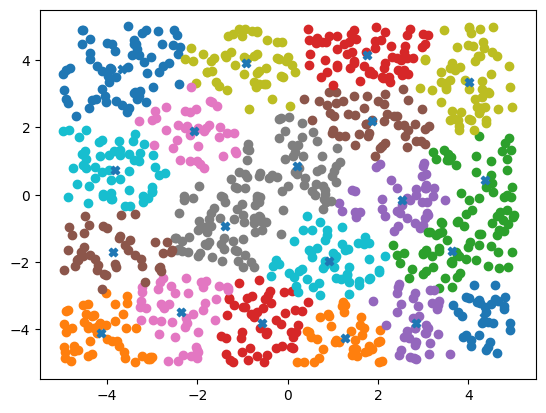

In [9]:
plot_clusters(X, cluster_assignments, centroids)

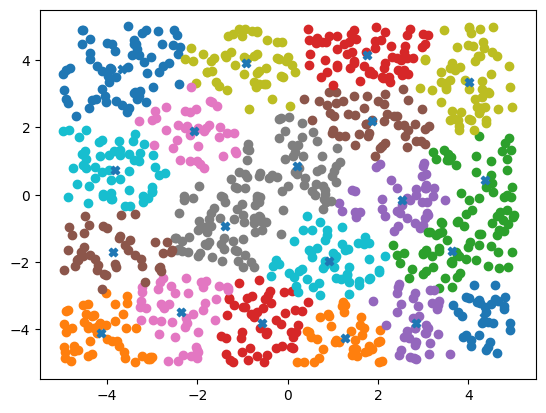

In [10]:
plot_clusters(X, cluster_assignments, centroids)

#### Exercise 2 Results:
* Clusters are different every time

### Exercise 3: k-means in scikit-learn

* Use the scikit-learn implementation of k-means to cluster X and compare the results to your implementation.

In [11]:
kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(X)

print(f"Labels: \n{kmeans.labels_} \nCenters: \n{kmeans.cluster_centers_}")

Labels: 
[ 3 18  0  0  2 13  7  5 15  5  1 11  7 17 10  3  3  6 17 19  3 11 18  4
  6  5 13 16 19 18  7 17  7  5 14 11 14  0 16  5 10  9  5 13 18  8  2  8
 16  8 12  1 18  4  0  5 17  7 15  9  5  0  1  7 13 10 11  0  0  1  1 12
 18 12 11  6  6  6  9  2  3  8 12  5  7 12  7  8  3 18 16  4  3  1  6 18
  8 12 16 16  0  2  6  3 16  6 14  6 18  3 11 10 18  3  8 11  9 16  2  0
 11  7 11  0 14 19  5  0  0 16  4  1  0  4  5 18  6 16 17 15 12  5  0 13
 15  4 11  0 14  7 12  2 19  2 12  9 18  4 13 15 16 16 18  2  0  2 18 11
 12 10 11 12  1 14  8 12 17 17  1  4  9  2 10 10 16  6 10  8  1  2 17  1
  0  2 12  0 10 15 19  3 11 15  4 13 11 10 16 18  0  7 12 13 13 10 13  4
  7  2 14 17 12 17  5  2 16  5  2  0 12 19 10 15  2 11  7 10  9 14 10  9
  9  2 10 19 13 15  3 15 13 15 15 18  7 10  5 10  3  5  8  5 17 18  2 10
 15  8 15  1 11  0 15  1  7  6  4  6 11  1  2  6  7  3 17  1  5 19  1  7
  5  7  6 13  9 13  6 18  0  7 12 18  0 17  6 13 11 12 15  9 15  0 17  7
 15 12  8 18 16 17  6 18  1  5  1  9  8  3

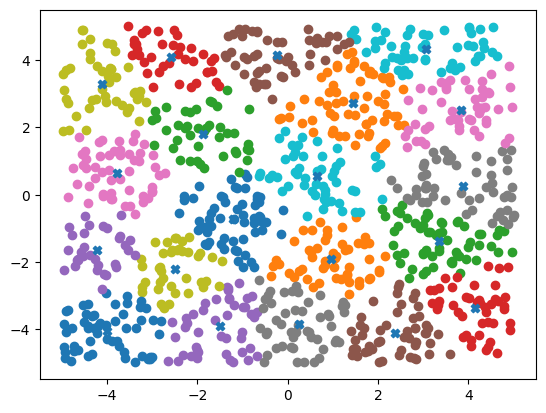

In [12]:
plot_clusters(X, kmeans.labels_, kmeans.cluster_centers_)

### Exercise 4: Silhouette

Use the ```silhouette_score()``` function in scikit-learn to determine the best number of cluster. Interpret and plot the results. To do so, perform kmeans clustering (use either scikit-learn or your own implementation) within a range of
clusters (2,k) and compute the silhouette score for your result. Print all silhouette scores and plot the clustering with the highest silhouette score.

* Use the ```silhouette_score()``` function in scikit-learn to determine the best number of clusters.
* Interpret and plot the results.
* Compare the silhouette score of a random clustering (use ```random_labels=True```  parameter) to a meaningful clustering.

In [13]:
# Generate data from k distinct clusters
#
def gen_data(k = 2, random_labels = False):
    X = []
    Y = []

    for i in range(k):
        std = np.random.randn()
        mean = np.random.randn() + i

        tmp = mean + np.random.uniform(-1, 1, size=(50, 2)) * std
        X.append(tmp)
        Y.append(np.ones(50) * i)

    Y = np.array(Y).ravel()
    if random_labels:
        np.random.shuffle(Y)

    return np.array(X).reshape(k * 50, 2), Y

No centroids to plot


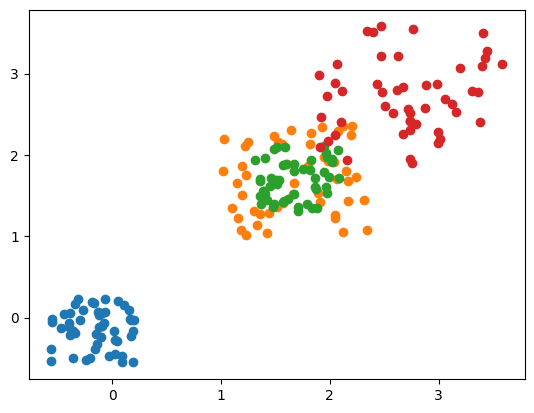

In [14]:
n_clusters = 4
X2, Y2 = gen_data(n_clusters)
plot_clusters(X2, Y2)

#### With the sklearn kmeans function

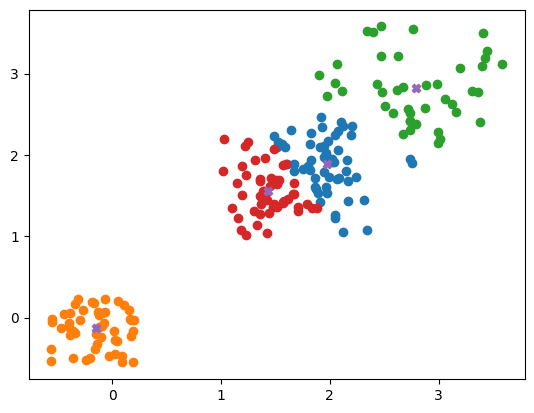

In [15]:
# clusters found by sklearn kmeans
kmeans_2 = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(X2)
plot_clusters(X2, kmeans_2.labels_, kmeans_2.cluster_centers_)

In [16]:
# silhouette score for sklearn kmeans result
silhouette_score(X2,kmeans_2.labels_)

np.float64(0.48694509959056304)

# Now to find the best silhouette score
## Sklearn solution

In [17]:
def best_silhouette_score(max_clusters, data):
    silhouette_scores = {}
    # try from 2 to max clusters and save in dict
    for n in range(2, max_clusters +1, 1):
        kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto").fit(data)
        silhouette_scores[n] = silhouette_score(data,kmeans.labels_)
    # return the best amount of clusters, and also all scores
    return max(silhouette_scores, key=silhouette_scores.get), silhouette_scores

In [18]:
best_n_k, silhouette_scores = best_silhouette_score(15, X2)

In [19]:
print(f"Silhouette Scores for each number of Clusters:")
silhouette_scores

Silhouette Scores for each number of Clusters:


{2: np.float64(0.7063480631758506),
 3: np.float64(0.6322887768487071),
 4: np.float64(0.48694509959056304),
 5: np.float64(0.4680487444640184),
 6: np.float64(0.45734912258517063),
 7: np.float64(0.48119393661978727),
 8: np.float64(0.3669341588732638),
 9: np.float64(0.37496032685906755),
 10: np.float64(0.3635945855681289),
 11: np.float64(0.35969691787500174),
 12: np.float64(0.34342691187378593),
 13: np.float64(0.34608133182992773),
 14: np.float64(0.35863848647176155),
 15: np.float64(0.3466974413076136)}

In [20]:
print(f"Ideal number of Clusters: {best_n_k}")

Ideal number of Clusters: 2


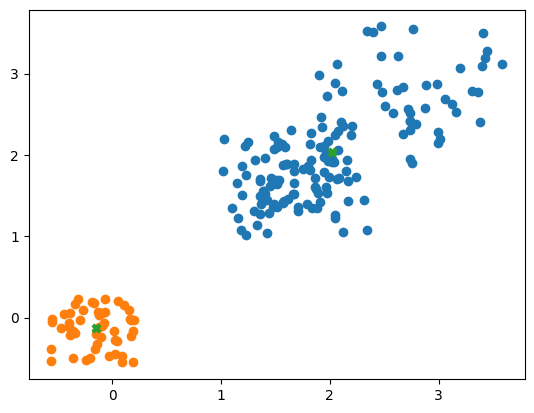

In [21]:
kmeans_optimal = KMeans(n_clusters=best_n_k, random_state=0, n_init="auto").fit(X2)
plot_clusters(X2, kmeans_optimal.labels_, kmeans_optimal.cluster_centers_)

## Own solution

In [22]:
def best_silhouette_score_selfmade(max_clusters, data):
    silhouette_scores_2 = {}
    # try from 2 to max clusters and save in dict
    for n in range(2, max_clusters +1, 1):
        centroids, cluster_assignments = kmeans(X = data, k = n)
        silhouette_scores[n] = silhouette_score(data,cluster_assignments)
    # return the best amount of clusters, and also all scores
    return max(silhouette_scores, key=silhouette_scores.get), silhouette_scores

In [25]:
best_n_k_selfmade, _ = best_silhouette_score_selfmade(15, X2)
best_n_k_selfmade

2

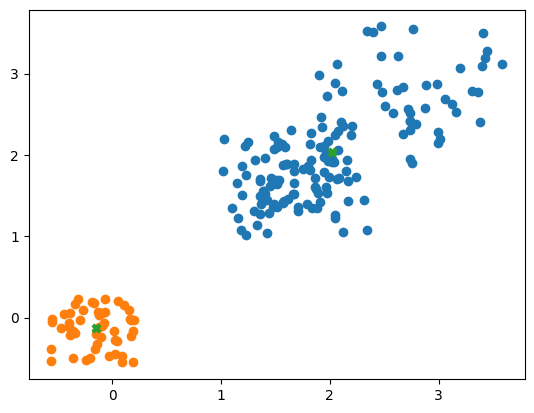

In [26]:
centroids, cluster_assignments = kmeans(X = X2, k = best_n_k_selfmade)
plot_clusters(X2, cluster_assignments, centroids)

#### With random clustering

In [27]:
# i use the data X we produced earlier
X

array([[-2.85965239,  4.8605674 ],
       [-4.87129193,  2.7123706 ],
       [-2.41028956, -0.54193915],
       ...,
       [ 4.22948103,  2.42429433],
       [-2.27527311, -3.9161599 ],
       [-1.28925372, -3.09314708]])

Optimal Number of clusters: 4


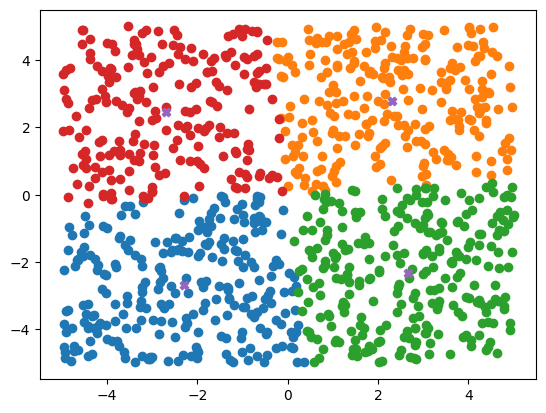

In [28]:
best_n_k_random, _ = best_silhouette_score(15, X)
print(f"Optimal Number of clusters: {best_n_k_random}")
kmeans_optimal = KMeans(n_clusters=best_n_k_random, random_state=0, n_init="auto").fit(X)
plot_clusters(X, kmeans_optimal.labels_, kmeans_optimal.cluster_centers_)

Optimal Number of clusters: 4


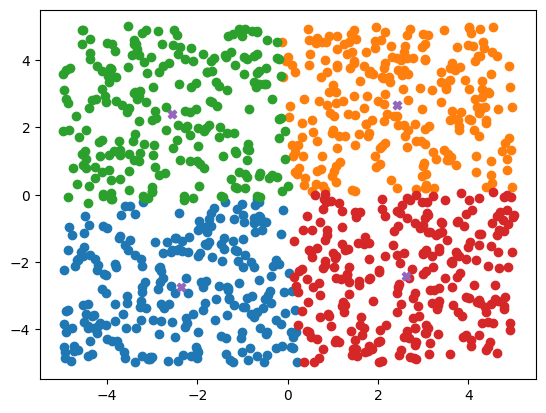

In [29]:
best_n_k_selfmade_random, _ = best_silhouette_score_selfmade(15, X)
print(f"Optimal Number of clusters: {best_n_k_selfmade_random}")
centroids, cluster_assignments = kmeans(X = X, k = best_n_k_selfmade_random)
plot_clusters(X, cluster_assignments, centroids)